#1 Histograms & Adaptive Histogram Equalization

In [ ]:
#1. Write a function named computeNormGrayHistogram with the following specifications:


import cv2
import numpy as np

def computeNormGrayHistogram(rgb_image):
    # Convert the RGB image to grayscale
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

    # Compute the histogram with 32 bins and normalize
    histogram, bin_edges = np.histogram(gray_image.flatten(), bins=32, range=[0, 256], density=True)

    return histogram



In [ ]:
#2. Write a function named computeNormRGBHistogram with the following specifications:


import cv2
import numpy as np
import matplotlib.pyplot as plt

def computeNormRGBHistogram(rgb_image):
    # Compute histograms for each color channel
    hist_red, bin_edges_red = np.histogram(rgb_image[:,:,0].flatten(), bins=32, range=[0, 256], density=True)
    hist_green, bin_edges_green = np.histogram(rgb_image[:,:,1].flatten(), bins=32, range=[0, 256], density=True)
    hist_blue, bin_edges_blue = np.histogram(rgb_image[:,:,2].flatten(), bins=32, range=[0, 256], density=True)

    # Normalize each histogram
    hist_red /= np.sum(hist_red)
    hist_green /= np.sum(hist_green)
    hist_blue /= np.sum(hist_blue)

    # Concatenate the histograms
    combined_histogram = np.concatenate((hist_red, hist_green, hist_blue))

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.title("Normalized RGB Histogram")
    plt.bar(np.arange(96), combined_histogram, color=['red', 'green', 'blue'], alpha=0.7)
    plt.xlabel("Bin")
    plt.ylabel("Normalized Frequency")
    plt.show()

    return combined_histogram



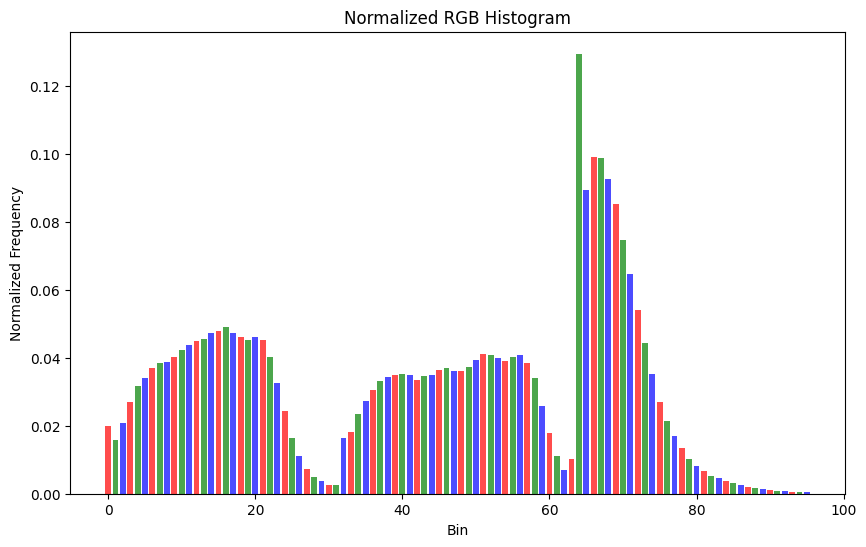

In [ ]:
#3. Call your functions to plot the histograms for the image forest.jpg

import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/forest.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Call computeNormGrayHistogram function
gray_histogram = computeNormGrayHistogram(image)

# Call computeNormRGBHistogram function
rgb_histogram = computeNormRGBHistogram(image)


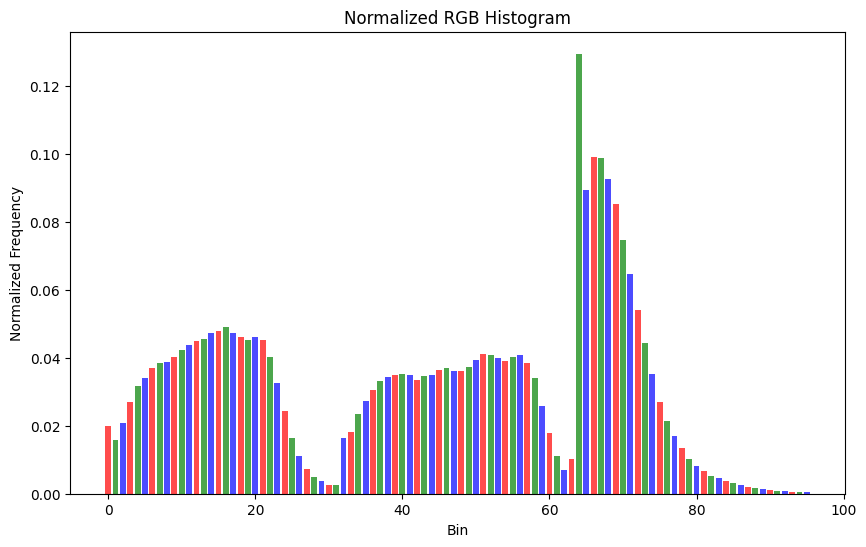

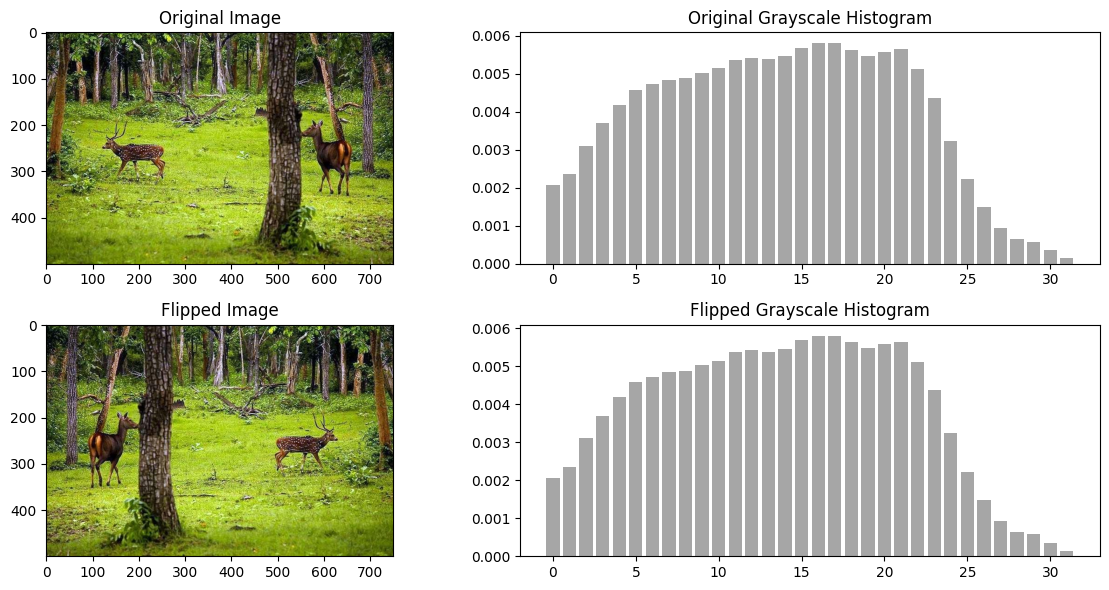

In [ ]:
#4. Flip the image horizontally and plot the histograms of the new image. What are the differences?


import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/forest.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from the path '{image_path}'. Please check the file path.")
else:
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flip the image horizontally
    flipped_image = cv2.flip(image, 1)

    # Call computeNormGrayHistogram function for the flipped image
    flipped_gray_histogram = computeNormGrayHistogram(flipped_image)

    # Call computeNormRGBHistogram function for the flipped image
    flipped_rgb_histogram = computeNormRGBHistogram(flipped_image)

    # Plot the original and flipped images
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.bar(np.arange(32), gray_histogram, color='gray', alpha=0.7)
    plt.title("Original Grayscale Histogram")

    plt.subplot(2, 2, 3)
    plt.imshow(flipped_image)
    plt.title("Flipped Image")

    plt.subplot(2, 2, 4)
    plt.bar(np.arange(32), flipped_gray_histogram, color='gray', alpha=0.7)
    plt.title("Flipped Grayscale Histogram")

    plt.tight_layout()
    plt.show()


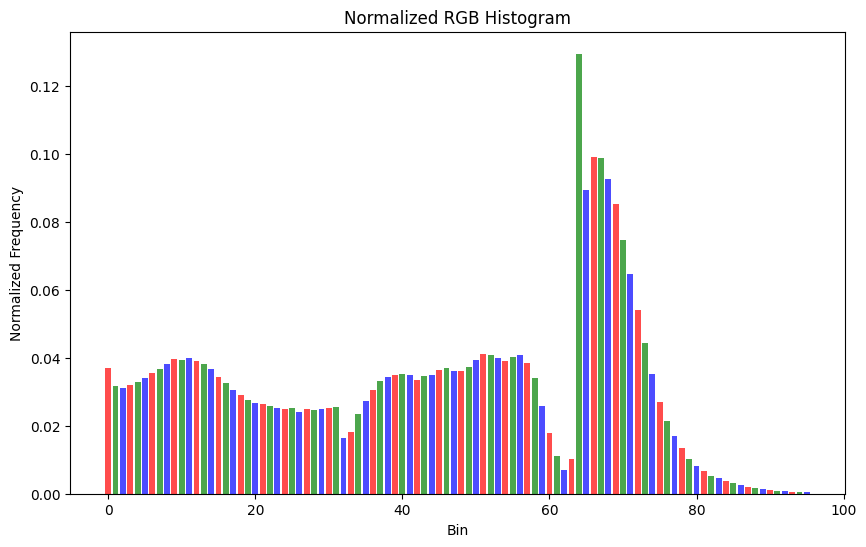

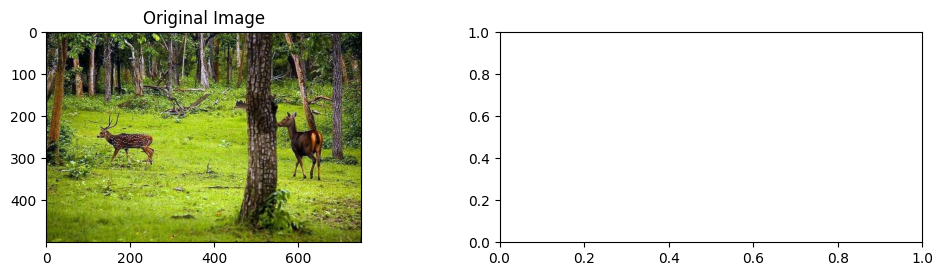

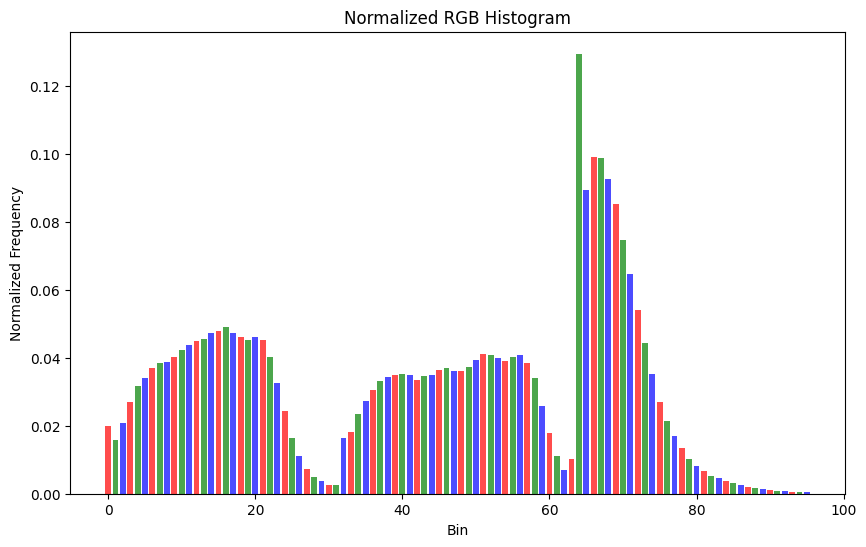

<ipython-input-8-d6fda526b152>:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


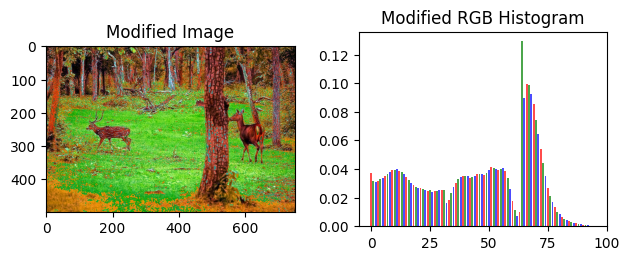

In [ ]:
#5. Double the values of the R channel in forest.jpg and display the image and histograms of the new image.
import cv2
import numpy as np
import matplotlib.pyplot as plt

def doubleRedChannel(image):
    # Create a copy of the image to avoid modifying the original
    modified_image = np.copy(image)

    # Double the values of the R channel
    modified_image[:, :, 0] = np.clip(modified_image[:, :, 0] * 2, 0, 255)

    return modified_image

# Load the image
image_path = '/content/forest.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from the path '{image_path}'. Please check the file path.")
else:
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Double the values of the R channel
    modified_image = doubleRedChannel(image)

    # Call computeNormRGBHistogram function for the modified image
    modified_rgb_histogram = computeNormRGBHistogram(modified_image)

    # Plot the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.bar(np.arange(96), computeNormRGBHistogram(image), color=['red', 'green', 'blue'], alpha=0.7)
    plt.title("Original RGB Histogram")

    plt.subplot(2, 2, 3)
    plt.imshow(modified_image)
    plt.title("Modified Image")

    plt.subplot(2, 2, 4)
    plt.bar(np.arange(96), modified_rgb_histogram, color=['red', 'green', 'blue'], alpha=0.7)
    plt.title("Modified RGB Histogram")

    plt.tight_layout()
    plt.show()


In [ ]:
#It is often found in image processing and related fields that real world data is unsuitable...

import cv2
import numpy as np

def adaptive_histogram_equalization(image, winSize):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Get image dimensions
    rows, cols = gray_image.shape

    # Create an empty array for the enhanced image
    enhanced_image = np.zeros_like(gray_image, dtype=np.uint8)

    # Iterate through the image pixels
    for i in range(rows):
        for j in range(cols):
            # Define the contextual region limits
            r1 = max(0, i - winSize // 2)
            r2 = min(rows, i + winSize // 2 + 1)
            c1 = max(0, j - winSize // 2)
            c2 = min(cols, j + winSize // 2 + 1)

            # Extract the contextual region
            context_region = gray_image[r1:r2, c1:c2]

            # Compute the histogram of the contextual region
            hist, _ = np.histogram(context_region.flatten(), bins=256, range=[0, 256], density=True)

            # Compute the cumulative distribution function (CDF)
            cdf = np.cumsum(hist)

            # Normalize the CDF to [0, 1]
            cdf_normalized = cdf / cdf[-1]

            # Map the pixel intensity to the enhanced value using the normalized CDF
            enhanced_image[i, j] = np.round(cdf_normalized[gray_image[i, j]] * 255)

    return enhanced_image

# Example usage:
# Assuming you have an RGB image stored in the variable 'image'
# and a specified window size 'winSize'
# enhanced_image = adaptive_histogram_equalization(image, winSize)
# cv2.imshow("Enhanced Image", enhanced_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


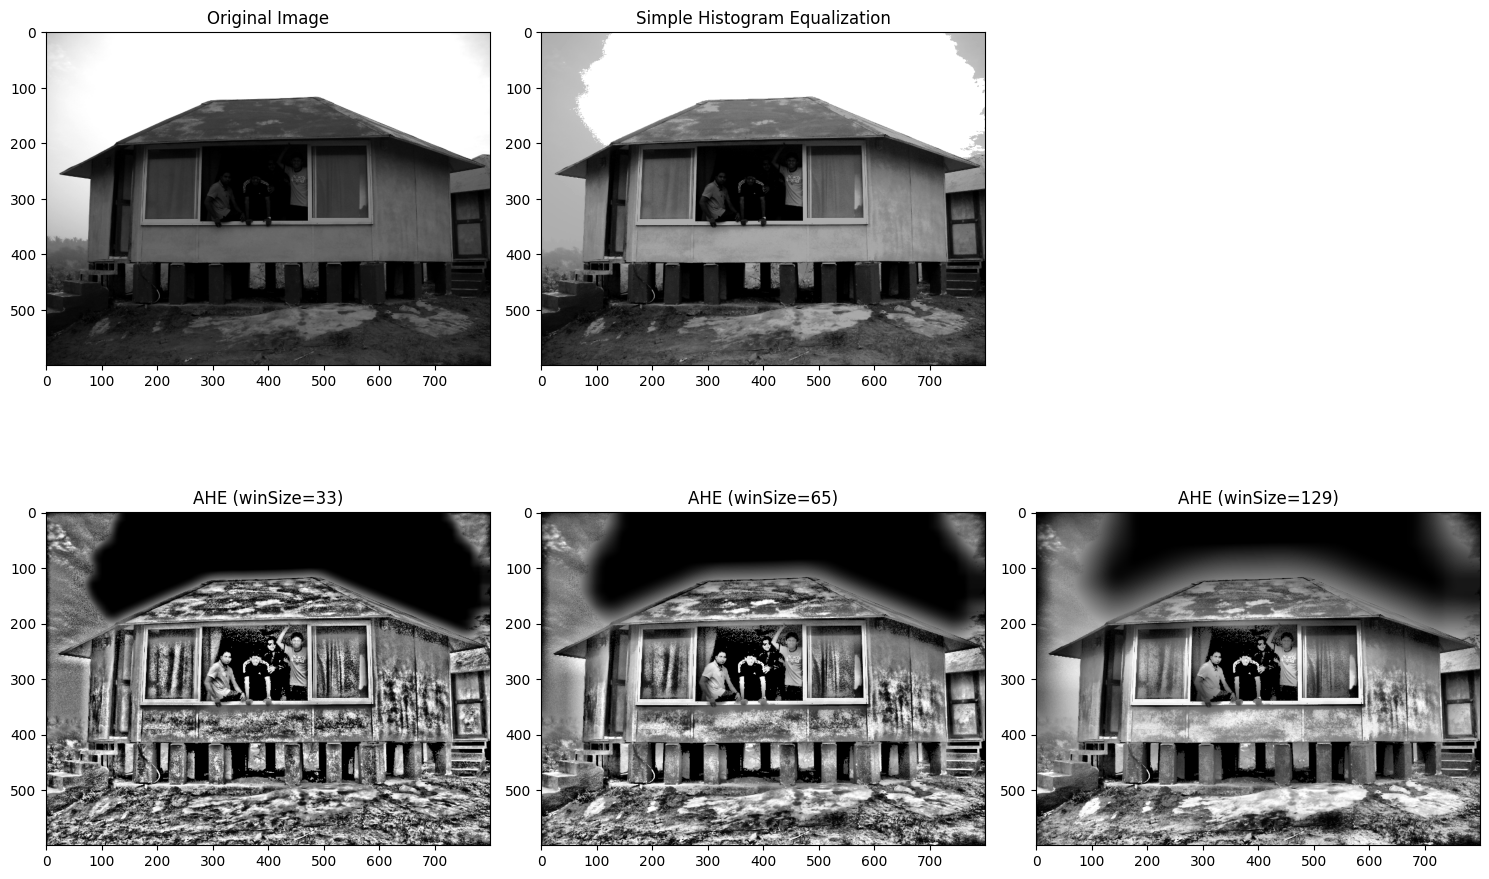

In [ ]:
#Evaluate your function on the image beach.png for winSize = 33, 65, and 129...

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image_path = '/content/beach.png'
original_image = cv2.imread(original_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale for histogram equalization
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Apply Simple Histogram Equalization
simple_he_image = cv2.equalizeHist(gray_image)

# Function to apply Adaptive Histogram Equalization (AHE)
def adaptive_histogram_equalization(image, winSize):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Get image dimensions
    rows, cols = gray_image.shape

    # Create an empty array for the enhanced image
    enhanced_image = np.zeros_like(gray_image, dtype=np.uint8)

    # Pad the image with mirroring on all 4 sides
    padded_image = cv2.copyMakeBorder(gray_image, winSize // 2, winSize // 2, winSize // 2, winSize // 2, cv2.BORDER_REFLECT)

    # Iterate through the image pixels
    for i in range(rows):
        for j in range(cols):
            # Define the contextual region limits
            r1 = i
            r2 = i + winSize
            c1 = j
            c2 = j + winSize

            # Extract the contextual region
            context_region = padded_image[r1:r2, c1:c2]

            # Flatten the contextual region
            context_flat = context_region.flatten()

            # Calculate the rank
            rank = np.sum(gray_image[i, j] > context_flat)

            # Compute the enhanced pixel value
            enhanced_image[i, j] = rank * 255 // (winSize * winSize)

    return enhanced_image

# Evaluate AHE for different winSize values
winSize_values = [33, 65, 129]
ahe_images = []

for winSize in winSize_values:
    ahe_result = adaptive_histogram_equalization(original_image, winSize)
    ahe_images.append((winSize, ahe_result))

# Plot the images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

# Simple Histogram Equalization
plt.subplot(2, 3, 2)
plt.imshow(simple_he_image, cmap='gray')
plt.title("Simple Histogram Equalization")

# AHE Images
for i, (winSize, ahe_result) in enumerate(ahe_images):
    plt.subplot(2, 3, i + 4)
    plt.imshow(ahe_result, cmap='gray')
    plt.title(f"AHE (winSize={winSize})")

plt.tight_layout()
plt.show()


#2 Filtering

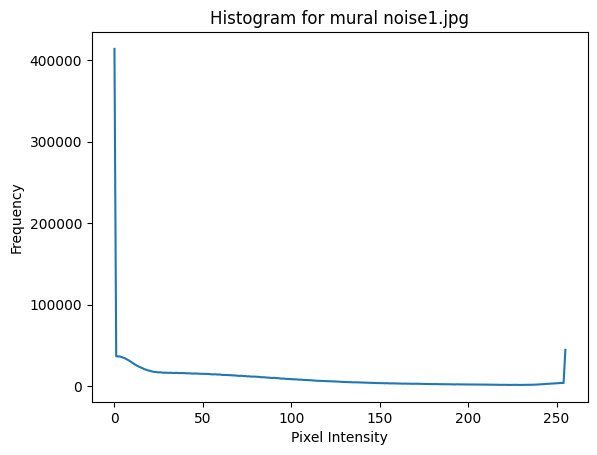

In [ ]:
#2. Generate a histogram and describe the issue with mural noise1.jpg. Is there a name for this?

import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/mural_noise1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Generate Histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot Histogram
plt.plot(hist)
plt.title('Histogram for mural noise1.jpg')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Possible issues or observations:

Clipping or Saturation:

The high frequency around pixel intensity 250 might suggest that pixel values are saturated or clipped at this level. This could lead to loss of information in the highlights.

Bi-Modal Distribution:

If the histogram has two distinct peaks, it could indicate a bi-modal distribution. This might suggest the presence of specific artifacts or noise in the image.

Dynamic Range Compression:

The concentration of frequencies around a specific intensity could imply a compression of the dynamic range. This might impact the overall contrast and details in the image.

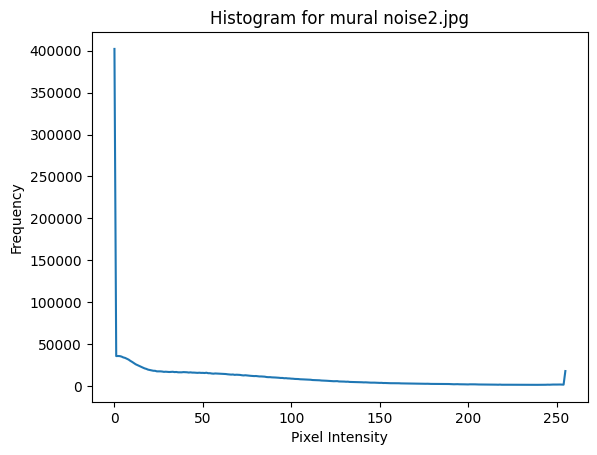

In [ ]:
#3. Generate a histogram and describe the issue with mural noise2.jpg. Is there a name for this?
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/mural_noise2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Generate Histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot Histogram
plt.plot(hist)
plt.title('Histogram for mural noise2.jpg')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Possible issues or observations:

Clipping or Saturation:

The high frequency around pixel intensity 250 might suggest that pixel values are saturated or clipped at this level. This could lead to loss of information in the highlights.

Bi-Modal Distribution:

If the histogram has two distinct peaks, it could indicate a bi-modal distribution. This might suggest the presence of specific artifacts or noise in the image.

Dynamic Range Compression:

The concentration of frequencies around a specific intensity could imply a compression of the dynamic range. This might impact the overall contrast and details in the image.

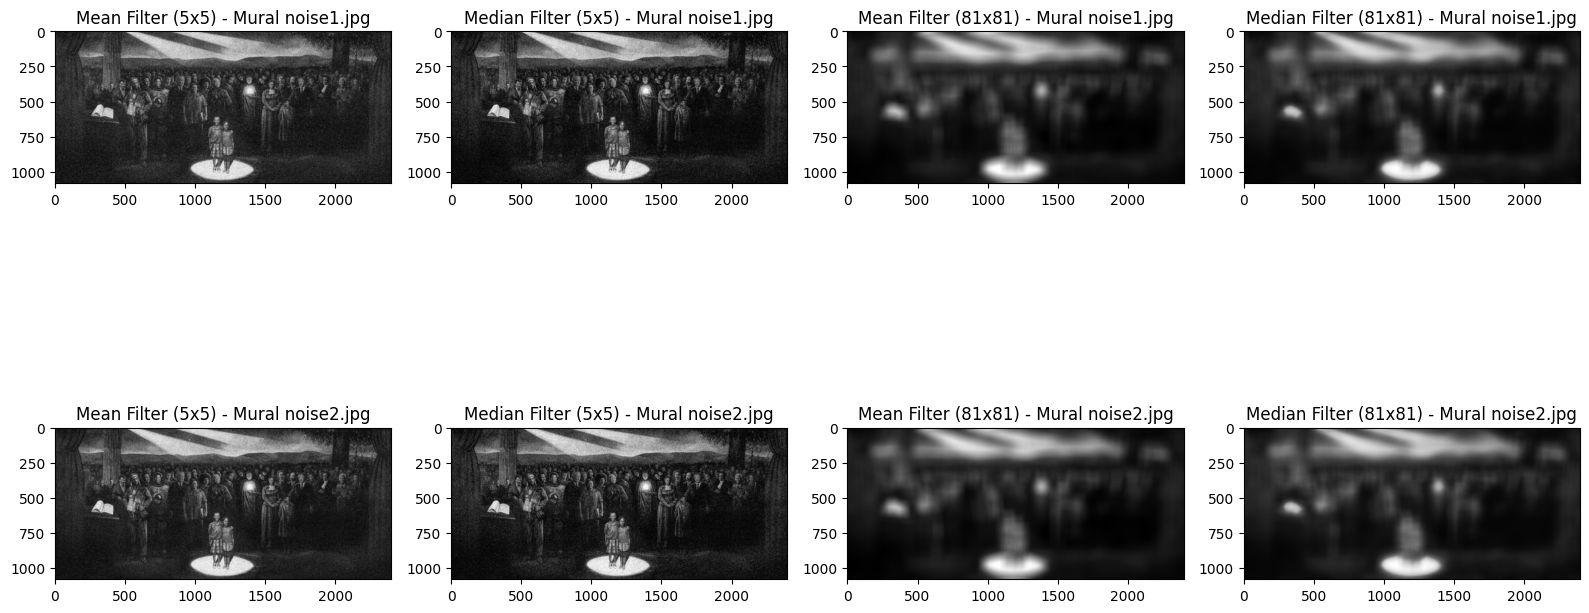

In [ ]:
#4. Implement and apply the following four filters each to mural noise1 and mural noise2...


import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Function to apply Mean filter
def mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
    return filtered_image

# Function to apply Median filter
def median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

# Load the noisy images
image_path_noise1 = '/content/mural_noise1.jpg'
image_path_noise2 = '/content/mural_noise2.jpg'
image_noise1 = cv2.imread(image_path_noise1, cv2.IMREAD_GRAYSCALE)
image_noise2 = cv2.imread(image_path_noise2, cv2.IMREAD_GRAYSCALE)

# Apply filters
mean_filter_5x5_noise1 = mean_filter(image_noise1, 5)
median_filter_5x5_noise1 = median_filter(image_noise1, 5)
mean_filter_81x81_noise1 = mean_filter(image_noise1, 81)
median_filter_81x81_noise1 = median_filter(image_noise1, 81)

mean_filter_5x5_noise2 = mean_filter(image_noise2, 5)
median_filter_5x5_noise2 = median_filter(image_noise2, 5)
mean_filter_81x81_noise2 = mean_filter(image_noise2, 81)
median_filter_81x81_noise2 = median_filter(image_noise2, 81)

# Plot the results
plt.figure(figsize=(16, 16))

# Mural noise1.jpg with Mean filter (5x5)
plt.subplot(4, 4, 1)
plt.imshow(mean_filter_5x5_noise1, cmap='gray')
plt.title('Mean Filter (5x5) - Mural noise1.jpg')

# Mural noise1.jpg with Median filter (5x5)
plt.subplot(4, 4, 2)
plt.imshow(median_filter_5x5_noise1, cmap='gray')
plt.title('Median Filter (5x5) - Mural noise1.jpg')

# Mural noise1.jpg with Mean filter (81x81)
plt.subplot(4, 4, 3)
plt.imshow(mean_filter_81x81_noise1, cmap='gray')
plt.title('Mean Filter (81x81) - Mural noise1.jpg')

# Mural noise1.jpg with Median filter (81x81)
plt.subplot(4, 4, 4)
plt.imshow(median_filter_81x81_noise1, cmap='gray')
plt.title('Median Filter (81x81) - Mural noise1.jpg')

# Mural noise2.jpg with Mean filter (5x5)
plt.subplot(4, 4, 5)
plt.imshow(mean_filter_5x5_noise2, cmap='gray')
plt.title('Mean Filter (5x5) - Mural noise2.jpg')

# Mural noise2.jpg with Median filter (5x5)
plt.subplot(4, 4, 6)
plt.imshow(median_filter_5x5_noise2, cmap='gray')
plt.title('Median Filter (5x5) - Mural noise2.jpg')

# Mural noise2.jpg with Mean filter (81x81)
plt.subplot(4, 4, 7)
plt.imshow(mean_filter_81x81_noise2, cmap='gray')
plt.title('Mean Filter (81x81) - Mural noise2.jpg')

# Mural noise2.jpg with Median filter (81x81)
plt.subplot(4, 4, 8)
plt.imshow(median_filter_81x81_noise2, cmap='gray')
plt.title('Median Filter (81x81) - Mural noise2.jpg')

plt.tight_layout()
plt.show()


In [ ]:
#5. Rank the four filters by their computation time, from smallest to largest.
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow

# Load the original images
image1_path = '/content/mural_noise1.jpg'
image2_path = '/content/mural_noise2.jpg'

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Function to implement Mean Filter
def mean_filter(image, neighborhood_size):
    kernel = np.ones((neighborhood_size, neighborhood_size), np.float32) / (neighborhood_size * neighborhood_size)
    result = cv2.filter2D(image, -1, kernel)
    return result

# Function to implement Median Filter
def median_filter(image, neighborhood_size):
    result = cv2.medianBlur(image, neighborhood_size)
    return result

# Function to apply filters and measure computation time
def apply_filter_and_measure_time(image, filter_function, neighborhood_size):
    start_time = time.time()
    filtered_image = filter_function(image, neighborhood_size)
    computation_time = time.time() - start_time
    return filtered_image, computation_time

# Apply and display filters for mural noise1.jpg
neighborhood_sizes = [5, 81]

for neighborhood_size in neighborhood_sizes:
    # Mean Filter
    mean_filtered_image1, mean_computation_time1 = apply_filter_and_measure_time(image1, mean_filter, neighborhood_size)
    cv2_imshow(mean_filtered_image1)
    cv2.waitKey(0)

    # Median Filter
    median_filtered_image1, median_computation_time1 = apply_filter_and_measure_time(image1, median_filter, neighborhood_size)
    cv2_imshow(median_filtered_image1)
    cv2.waitKey(0)

# Apply and display filters for mural noise2.jpg
for neighborhood_size in neighborhood_sizes:
    # Mean Filter
    mean_filtered_image2, mean_computation_time2 = apply_filter_and_measure_time(image2, mean_filter, neighborhood_size)
    cv2_imshow(mean_filtered_image2)
    cv2.waitKey(0)

    # Median Filter
    median_filtered_image2, median_computation_time2 = apply_filter_and_measure_time(image2, median_filter, neighborhood_size)
    cv2_imshow(median_filtered_image2)
    cv2.waitKey(0)

# Rank filters by computation time
time_ranking = {
    "Mean Filter 5x5": mean_computation_time1,
    "Median Filter 5x5": median_computation_time1,
    "Mean Filter 81x81": mean_computation_time2,
    "Median Filter 81x81": median_computation_time2
}

sorted_ranking = sorted(time_ranking.items(), key=lambda x: x[1])

print("Filter Ranking by Computation Time:")
for filter_name, computation_time in sorted_ranking:
    print(f"{filter_name}: {computation_time} seconds")

cv2.destroyAllWindows()

#6. Which filter would you choose to restore mural noise1 ?


The choice of a filter for restoring an image depends on the specific characteristics of the noise and the desired outcome. Here are some considerations for each filter:

Mean Filter (5x5):

Pros: Effective in reducing random noise. Smoothens the image.
Cons: May blur fine details and edges.

Median Filter (5x5):

Pros: Efficient in removing salt-and-pepper noise. Preserves edges better than mean filter.
Cons: Can result in some loss of fine details.

Mean Filter (81x81):

Pros: Provides stronger smoothing, potentially effective for broader noise patterns.
Cons: Might excessively blur the image, leading to loss of details and edges.

Median Filter (81x81):

Pros: Robust against salt-and-pepper noise, especially with a large neighborhood.
Cons: Can still cause blurring, especially in areas with continuous patterns.

Recommendation:

Considering that mural noise1.jpg likely contains random noise, a Median Filter with a 5x5 neighborhood may be a suitable choice. This filter is effective in reducing salt-and-pepper noise while preserving edges and fine details to a reasonable extent.

Additional Considerations:

It's advisable to visually inspect the results of each filter and evaluate how well they address the specific noise characteristics in mural noise1.jpg.
The optimal choice may depend on subjective preferences and the level of acceptable detail loss in the image.

#7. Which filter would you choose to restore mural noise2 ?


The choice of a filter for restoring an image depends on the specific characteristics of the noise and the desired outcome. Here are some considerations for each filter applied to mural noise2:

Mean Filter (5x5):

Pros: Effective in reducing random noise. Smoothens the image.
Cons: May blur fine details and edges.

Median Filter (5x5):

Pros: Efficient in removing salt-and-pepper noise. Preserves edges better than mean filter.
Cons: Can result in some loss of fine details.

Mean Filter (81x81):

Pros: Provides stronger smoothing, potentially effective for broader noise patterns.
Cons: Might excessively blur the image, leading to loss of details and edges.

Median Filter (81x81):

Pros: Robust against salt-and-pepper noise, especially with a large neighborhood.
Cons: Can still cause blurring, especially in areas with continuous patterns.

Recommendation:

Considering that mural noise2.jpg likely contains noise that might benefit from broader smoothing, a Mean Filter with an 81x81 neighborhood could be a suitable choice. This filter is effective in reducing overall noise, though it might lead to some loss of finer details.

Additional Considerations:

Visual inspection of the results is crucial to evaluate how well each filter addresses the specific noise characteristics in mural noise2.jpg.
The optimal choice may depend on subjective preferences and the level of acceptable detail loss in the image.

#8. Consider a template window which slides along an image, and imagine the template..

To formulate an expression E(i, j) that represents the minimization problem for detecting a template in an image, you can use the sum of squared differences (SSD) or cross-correlation. Here's an example using SSD:

Let f(i, j) be the pixel intensity of the original image at position (i, j), and t(i, j) be the pixel intensity of the template at the corresponding position. The expression for SSD is given by:

$
E(i,j)
=
∑
k,l
f(i+k,j+l)−t(k,l))
2$

where the summation is over all pixel positions (k, l) in the template window.

The idea is to slide the template window over the image, calculating the SSD at each position. The position (i, j) where E(i, j) is minimized corresponds to the best match for the template in the original image.

#9. Expand your expression (this is another hint for part 8), and note that the...

Expanding the SSD expression and simplifying, we get:

$E(i,j)=∑
k,l
 f(i+k,j+l)
2
 −2∑
k,l
 f(i+k,j+l)⋅t(k,l)+∑
k,l
 t(k,l)
2$

Now, let's analyze the terms:

$∑
k,l
 f(i+k,j+l)
2$ represents the sum of squared pixel intensities in the original image window.

$∑
k,l
 t(k,l)
2$  is the sum of squared pixel intensities in the template.

The middle term,$
2∑
k,l
​
 f(i+k,j+l)⋅t(k,l),$ is twice the sum of the element-wise product of the pixel intensities in the original image window and the template.

 Given the assumptions and the constant
$
t
2$ term, maximizing the expansion is equivalent to minimizing the SSD. Therefore, we seek to maximize the term:

$∑
k,l
 f(i+k,j+l)⋅t(k,l)$

 This term represents the cross-correlation between the pixel intensities in the original image window and the template. In the case of a perfect match, this term will be maximized, leading to a minimum value of the SSD expression, and vice versa for an imperfect match.



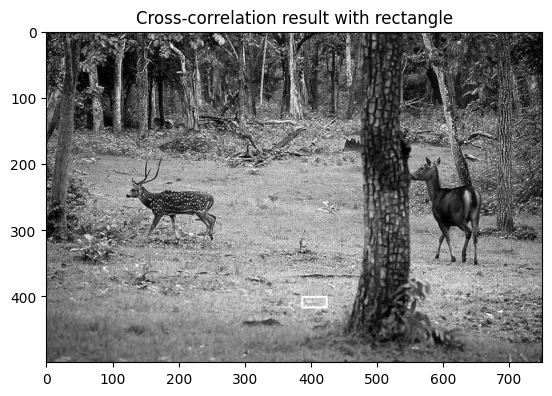

In [ ]:
#10. We use the name cross-correlation to describe the expression in part 9...

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and template
img = cv2.imread('/content/forest.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/template.jpg', cv2.IMREAD_GRAYSCALE)

# Perform cross-correlation
result = cv2.matchTemplate(img, template, cv2.TM_CCORR)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the detected location
rect_top_left = max_loc
rect_bottom_right = (rect_top_left[0] + template.shape[1], rect_top_left[1] + template.shape[0])
cv2.rectangle(img, rect_top_left, rect_bottom_right, 255, 2)

# Display the result
plt.imshow(img, cmap='gray')
plt.title('Cross-correlation result with rectangle')
plt.show()


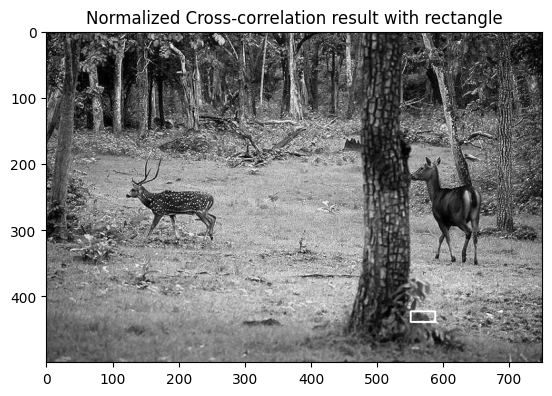

In [ ]:
#11. One way to mitigate the problem you identified in part 3 is using normalized...

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and template
img = cv2.imread('/content/forest.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with the actual path to your original image
template = cv2.imread('/content/template.jpg', cv2.IMREAD_GRAYSCALE)

# Perform normalized cross-correlation
result_normed = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)

# Find the location of the best match
min_val_normed, max_val_normed, min_loc_normed, max_loc_normed = cv2.minMaxLoc(result_normed)

# Draw a rectangle around the detected location
rect_top_left_normed = max_loc_normed
rect_bottom_right_normed = (rect_top_left_normed[0] + template.shape[1], rect_top_left_normed[1] + template.shape[0])
cv2.rectangle(img, rect_top_left_normed, rect_bottom_right_normed, 255, 2)

# Display the result with normalized cross-correlation
plt.imshow(img, cmap='gray')
plt.title('Normalized Cross-correlation result with rectangle')
plt.show()


#3 Canny Edge Detector

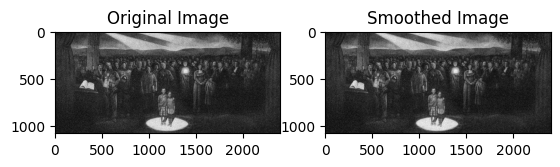

In [ ]:
#3.1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/mural_noise1.jpg'  # Replace with the actual path to your grayscale image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Smoothing with a Gaussian filter
# Define the Gaussian kernel
gaussian_kernel = (1/159) * np.array([[2, 4, 5, 4, 2],
                                      [4, 9, 12, 9, 4],
                                      [5, 12, 15, 12, 5],
                                      [4, 9, 12, 9, 4],
                                      [2, 4, 5, 4, 2]])

# Apply Gaussian filter
smoothed_image = cv2.filter2D(original_image, -1, gaussian_kernel)

# Display the original and smoothed images
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')

plt.show()


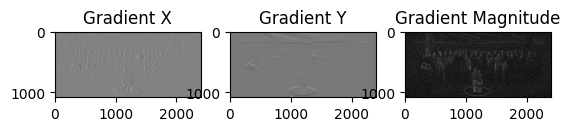

In [ ]:
#3.2
# Step 2: Finding Gradients with Sobel operators
# Define Sobel kernels
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel operators
gradient_x = cv2.filter2D(smoothed_image, cv2.CV_64F, kx)
gradient_y = cv2.filter2D(smoothed_image, cv2.CV_64F, ky)

# Calculate gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Display the gradient images
plt.subplot(1, 3, 1)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient X')

plt.subplot(1, 3, 2)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient Y')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.show()


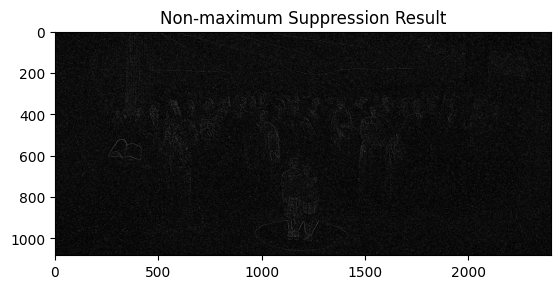

In [ ]:
#3.3
# Step 3: Non-maximum Suppression (NMS)
def apply_nms(gradient_magnitude, gradient_direction):
    rows, cols = gradient_magnitude.shape
    nms_result = np.zeros_like(gradient_magnitude)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = gradient_direction[i, j]

            # Round the gradient direction to the nearest 45 degrees
            if (0 <= angle < np.pi/8) or (15*np.pi/8 <= angle <= 2*np.pi):
                neighbors = [gradient_magnitude[i, j - 1], gradient_magnitude[i, j + 1]]
            elif (np.pi/8 <= angle < 3*np.pi/8) or (9*np.pi/8 <= angle < 11*np.pi/8):
                neighbors = [gradient_magnitude[i - 1, j - 1], gradient_magnitude[i + 1, j + 1]]
            elif (3*np.pi/8 <= angle < 5*np.pi/8) or (11*np.pi/8 <= angle < 13*np.pi/8):
                neighbors = [gradient_magnitude[i - 1, j], gradient_magnitude[i + 1, j]]
            else:
                neighbors = [gradient_magnitude[i - 1, j + 1], gradient_magnitude[i + 1, j - 1]]

            # Compare edge strength and perform non-maximum suppression
            if gradient_magnitude[i, j] >= max(neighbors):
                nms_result[i, j] = gradient_magnitude[i, j]

    return nms_result

# Apply Non-maximum Suppression
nms_result = apply_nms(gradient_magnitude, gradient_direction)

# Display the NMS result
plt.imshow(nms_result, cmap='gray')
plt.title('Non-maximum Suppression Result')
plt.show()


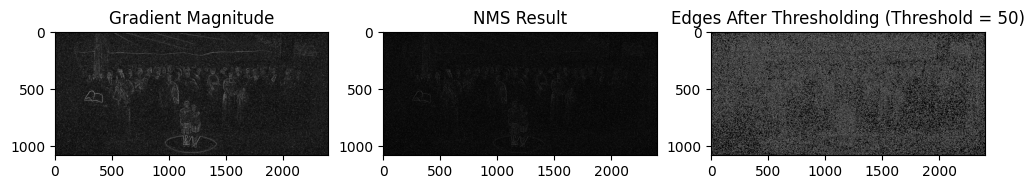

In [ ]:
#3.4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = '/content/mural_noise1.jpg'  # Replace with the actual path to your grayscale image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Gaussian kernel
gaussian_kernel = (1/159) * np.array([[2, 4, 5, 4, 2],
                                      [4, 9, 12, 9, 4],
                                      [5, 12, 15, 12, 5],
                                      [4, 9, 12, 9, 4],
                                      [2, 4, 5, 4, 2]])

# Apply Gaussian filter
smoothed_image = cv2.filter2D(original_image, -1, gaussian_kernel)

# Define Sobel kernels
kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel operators
gradient_x = cv2.filter2D(smoothed_image, cv2.CV_64F, kx)
gradient_y = cv2.filter2D(smoothed_image, cv2.CV_64F, ky)

# Calculate gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Non-maximum Suppression (NMS)
def apply_nms(gradient_magnitude, gradient_direction):
    rows, cols = gradient_magnitude.shape
    nms_result = np.zeros_like(gradient_magnitude)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = gradient_direction[i, j]

            if (0 <= angle < np.pi/8) or (15*np.pi/8 <= angle <= 2*np.pi):
                neighbors = [gradient_magnitude[i, j - 1], gradient_magnitude[i, j + 1]]
            elif (np.pi/8 <= angle < 3*np.pi/8) or (9*np.pi/8 <= angle < 11*np.pi/8):
                neighbors = [gradient_magnitude[i - 1, j - 1], gradient_magnitude[i + 1, j + 1]]
            elif (3*np.pi/8 <= angle < 5*np.pi/8) or (11*np.pi/8 <= angle < 13*np.pi/8):
                neighbors = [gradient_magnitude[i - 1, j], gradient_magnitude[i + 1, j]]
            else:
                neighbors = [gradient_magnitude[i - 1, j + 1], gradient_magnitude[i + 1, j - 1]]

            if gradient_magnitude[i, j] >= max(neighbors):
                nms_result[i, j] = gradient_magnitude[i, j]

    return nms_result

# Apply Non-maximum Suppression
nms_result = apply_nms(gradient_magnitude, gradient_direction)

# Thresholding
threshold_value = 50  # Experiment with different threshold values
edges_after_thresholding = np.where(nms_result > threshold_value, 255, 0).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 3, 2)
plt.imshow(nms_result, cmap='gray')
plt.title('NMS Result')

plt.subplot(1, 3, 3)
plt.imshow(edges_after_thresholding, cmap='gray')
plt.title(f'Edges After Thresholding (Threshold = {threshold_value})')

plt.show()
